<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [7]:
import os
import numpy as np
import pandas as pd
from keras import layers
from keras import models
from keras import optimizers
from keras.utils import to_categorical
from keras.preprocessing.image import array_to_img, img_to_array, list_pictures, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Data_Entry_2017.csv', encoding='us-ascii')
Findings = df["Finding Labels"].str.split('|')
Findings_list = [word for word_inner in Findings for word in word_inner]
Findings_list = pd.DataFrame(Findings_list, columns=['text'])
Findings_list['text'].value_counts()

No Finding            60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
Name: text, dtype: int64

In [9]:
y = df['Finding Labels'] == 'No Finding'
#y = y.astype(int)
files = df['Image Index']

#To avoid MemoryError
sample = 1000
y = y[:sample]
y = to_categorical(y)
files = files[:sample]

imgs = np.empty([len(files), 1024, 1024, 1])
for i, file in enumerate(files):
    temp_img = load_img(
        os.path.join('./images', file), grayscale=True)
    imgs[i] = img_to_array(temp_img)/255

x_train, x_test, y_train, y_test = train_test_split(imgs, y, test_size=0.3, random_state=1)

In [ ]:
array_to_img(imgs[-1])
temp_img

In [6]:
model = models.Sequential()
model.add(
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(1024, 1024, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

model.compile(
    optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=10,
    validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 1020, 1020, 32)    832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 510, 510, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 506, 506, 64)      51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 168, 168, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 164, 164, 128)     204928    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 128)       409728    
__________

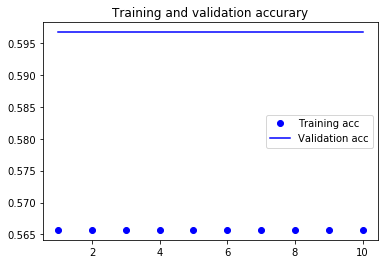

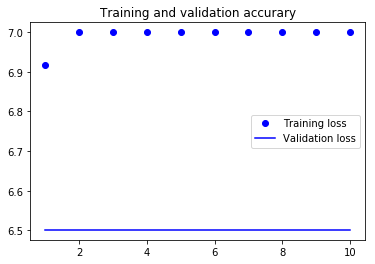

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
ephocs = range(1,len(acc)+1)
plt.plot(ephocs, acc, 'bo', label='Training acc')
plt.plot(ephocs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accurary')
plt.legend()

plt.figure()

plt.plot(ephocs, loss, 'bo', label='Training loss')
plt.plot(ephocs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accurary')
plt.legend()

plt.show()

In [28]:
y_copy = y_test.copy()
np.random.shuffle(y_copy)
float(np.sum(y_copy==y_test)/(len(y_copy)*2))

0.4711111111111111

In [24]:
y_test

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,